In [63]:
import pandas as pd
df = pd.read_csv('C:/Users/Usuario/Downloads/Proyecto 2/Base de Datos - Icfes.csv')
df.shape

(570464, 51)

In [64]:
df = df.drop(columns=['PERIODO', 'ESTU_TIPODOCUMENTO', 'ESTU_CONSECUTIVO', 'COLE_COD_DANE_ESTABLECIMIENTO', 
                      'COLE_COD_DANE_SEDE', 'COLE_COD_DEPTO_UBICACION', 'COLE_CODIGO_ICFES', 'COLE_DEPTO_UBICACION', 
                      'COLE_NATURALEZA', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 'COLE_SEDE_PRINCIPAL', 
                      'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 
                      'ESTU_DEPTO_RESIDE', 'ESTU_ESTUDIANTE', 'ESTU_ESTADOINVESTIGACION', 'ESTU_FECHANACIMIENTO', 
                      'ESTU_GENERO', 'ESTU_MCPIO_PRESENTACION', 'ESTU_NACIONALIDAD', 'ESTU_MCPIO_RESIDE', 
                      'ESTU_PRIVADO_LIBERTAD', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 
                      'FAMI_PERSONASHOGAR', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA'])


In [65]:
df = df.dropna()

In [66]:
paises_unicos = df['ESTU_PAIS_RESIDE'].dropna().unique()

# Municipios de ubicación de colegios
municipios_dict = dict(df[['COLE_COD_MCPIO_UBICACION', 'COLE_MCPIO_UBICACION']].drop_duplicates().values)

# Departamentos de presentación de icfes
departamentos_dict = dict(df[['ESTU_COD_DEPTO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION']].drop_duplicates().values)

# Paises de residencia de los estudiantes
pais_dict = {pais: idx for idx, pais in enumerate(sorted(paises_unicos))}

In [67]:
# Obtener rango de puntaje asociado a cada nivel de desempeño
rangos_ingles = df.groupby('DESEMP_INGLES')['PUNT_INGLES'].agg(['min', 'max']).sort_index()

# Corregir los rangos para que no haya espacios de puntaje sin tener en consideración
rangos_desemp_ingles = {
    'A-': (0, 49),
    'A1': (50, 58),
    'A2': (59, 69),
    'B1': (70, 84),
    'B+': (85, 100)}


In [68]:
df['COLE_AREA_UBICACION'] = df['COLE_AREA_UBICACION'].map({'URBANO': 1, 'RURAL': 0})
df['COLE_BILINGUE'] = df['COLE_BILINGUE'].map({'N': 0, 'S': 1})
df['COLE_CALENDARIO'] = df['COLE_CALENDARIO'].map({'A': 1, 'B': 2, 'OTRO': 0})
df = df[df['COLE_CARACTER'] != 'NO APLICA']
df['COLE_CARACTER'] = df['COLE_CARACTER'].map({'ACADÉMICO': 0,'TÉCNICO/ACADÉMICO': 1,'TÉCNICO': 2})
df['COLE_GENERO'] = df['COLE_GENERO'].map({'MIXTO': 0, 'FEMENINO': 1, 'MASCULINO': 2})
df['COLE_JORNADA'] = df['COLE_JORNADA'].map({'COMPLETA': 0, 'UNICA': 0,'MAÑANA': 1, 'TARDE': 2, 'NOCHE': 3, 'SABATINA': 4})
df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].map({'Estrato 1': 1, 'Estrato 2': 2,'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6})
df['FAMI_TIENECOMPUTADOR'] = df['FAMI_TIENECOMPUTADOR'].map({'Si': 1, 'No': 0})
df['FAMI_TIENEINTERNET'] = df['FAMI_TIENEINTERNET'].map({'Si': 1, 'No': 0})
df['ESTU_PAIS_RESIDE'] = df['ESTU_PAIS_RESIDE'].map(pais_dict)

In [69]:
df.head()

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_MCPIO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,ESTU_COD_DEPTO_PRESENTACION,ESTU_DEPTO_PRESENTACION,...,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,1,0,0,0,11001,0,1,BOGOTÁ D.C.,25.0,CUNDINAMARCA,...,2,1,1,A-,42,43,46,52,45,231
1,0,1,2,0,25175,0,0,CHIA,11.0,BOGOTÁ,...,4,1,1,B1,80,68,58,75,64,337
2,1,1,2,0,11001,0,0,BOGOTÁ D.C.,11.0,BOGOTÁ,...,5,1,1,B+,90,61,72,81,72,365
4,1,0,1,0,5001,0,4,MEDELLIN,5.0,ANTIOQUIA,...,1,0,0,A-,45,39,36,42,39,197
5,1,0,2,0,76001,0,1,CALI,76.0,VALLE,...,3,1,1,A-,47,48,54,52,52,256


In [70]:
df = df.drop(columns=['COLE_MCPIO_UBICACION', 'ESTU_DEPTO_PRESENTACION', 'DESEMP_INGLES', 'PUNT_MATEMATICAS',
                       'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL'])

In [71]:
df.head()

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_MCPIO_UBICACION,COLE_GENERO,COLE_JORNADA,ESTU_COD_DEPTO_PRESENTACION,ESTU_PAIS_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,PUNT_INGLES
0,1,0,0,0,11001,0,1,25.0,18,2,1,1,42
1,0,1,2,0,25175,0,0,11.0,18,4,1,1,80
2,1,1,2,0,11001,0,0,11.0,18,5,1,1,90
4,1,0,1,0,5001,0,4,5.0,18,1,0,0,45
5,1,0,2,0,76001,0,1,76.0,18,3,1,1,47


In [72]:
df.describe()

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_MCPIO_UBICACION,COLE_GENERO,COLE_JORNADA,ESTU_COD_DEPTO_PRESENTACION,ESTU_PAIS_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,PUNT_INGLES
count,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000
mean,0.877154,0.019116,1.020813,0.583019,33358.879471,0.053329,1.277928,33.069910,18.007747,1.906304,0.623991,0.537647,50.954982
std,0.328261,0.136932,0.184001,0.681900,26989.919237,0.265224,1.059579,26.989472,0.467321,1.006833,0.484383,0.498581,11.570943
min,0.000000,0.000000,0.000000,0.000000,5001.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,11001.000000,0.000000,1.000000,11.000000,18.000000,1.000000,0.000000,0.000000,43.000000
50%,1.000000,0.000000,1.000000,0.000000,20238.000000,0.000000,1.000000,20.000000,18.000000,2.000000,1.000000,1.000000,49.000000
75%,1.000000,0.000000,1.000000,1.000000,54874.000000,0.000000,2.000000,54.000000,18.000000,2.000000,1.000000,1.000000,54.000000
max,1.000000,1.000000,2.000000,2.000000,99773.000000,2.000000,4.000000,99.000000,49.000000,6.000000,1.000000,1.000000,100.000000


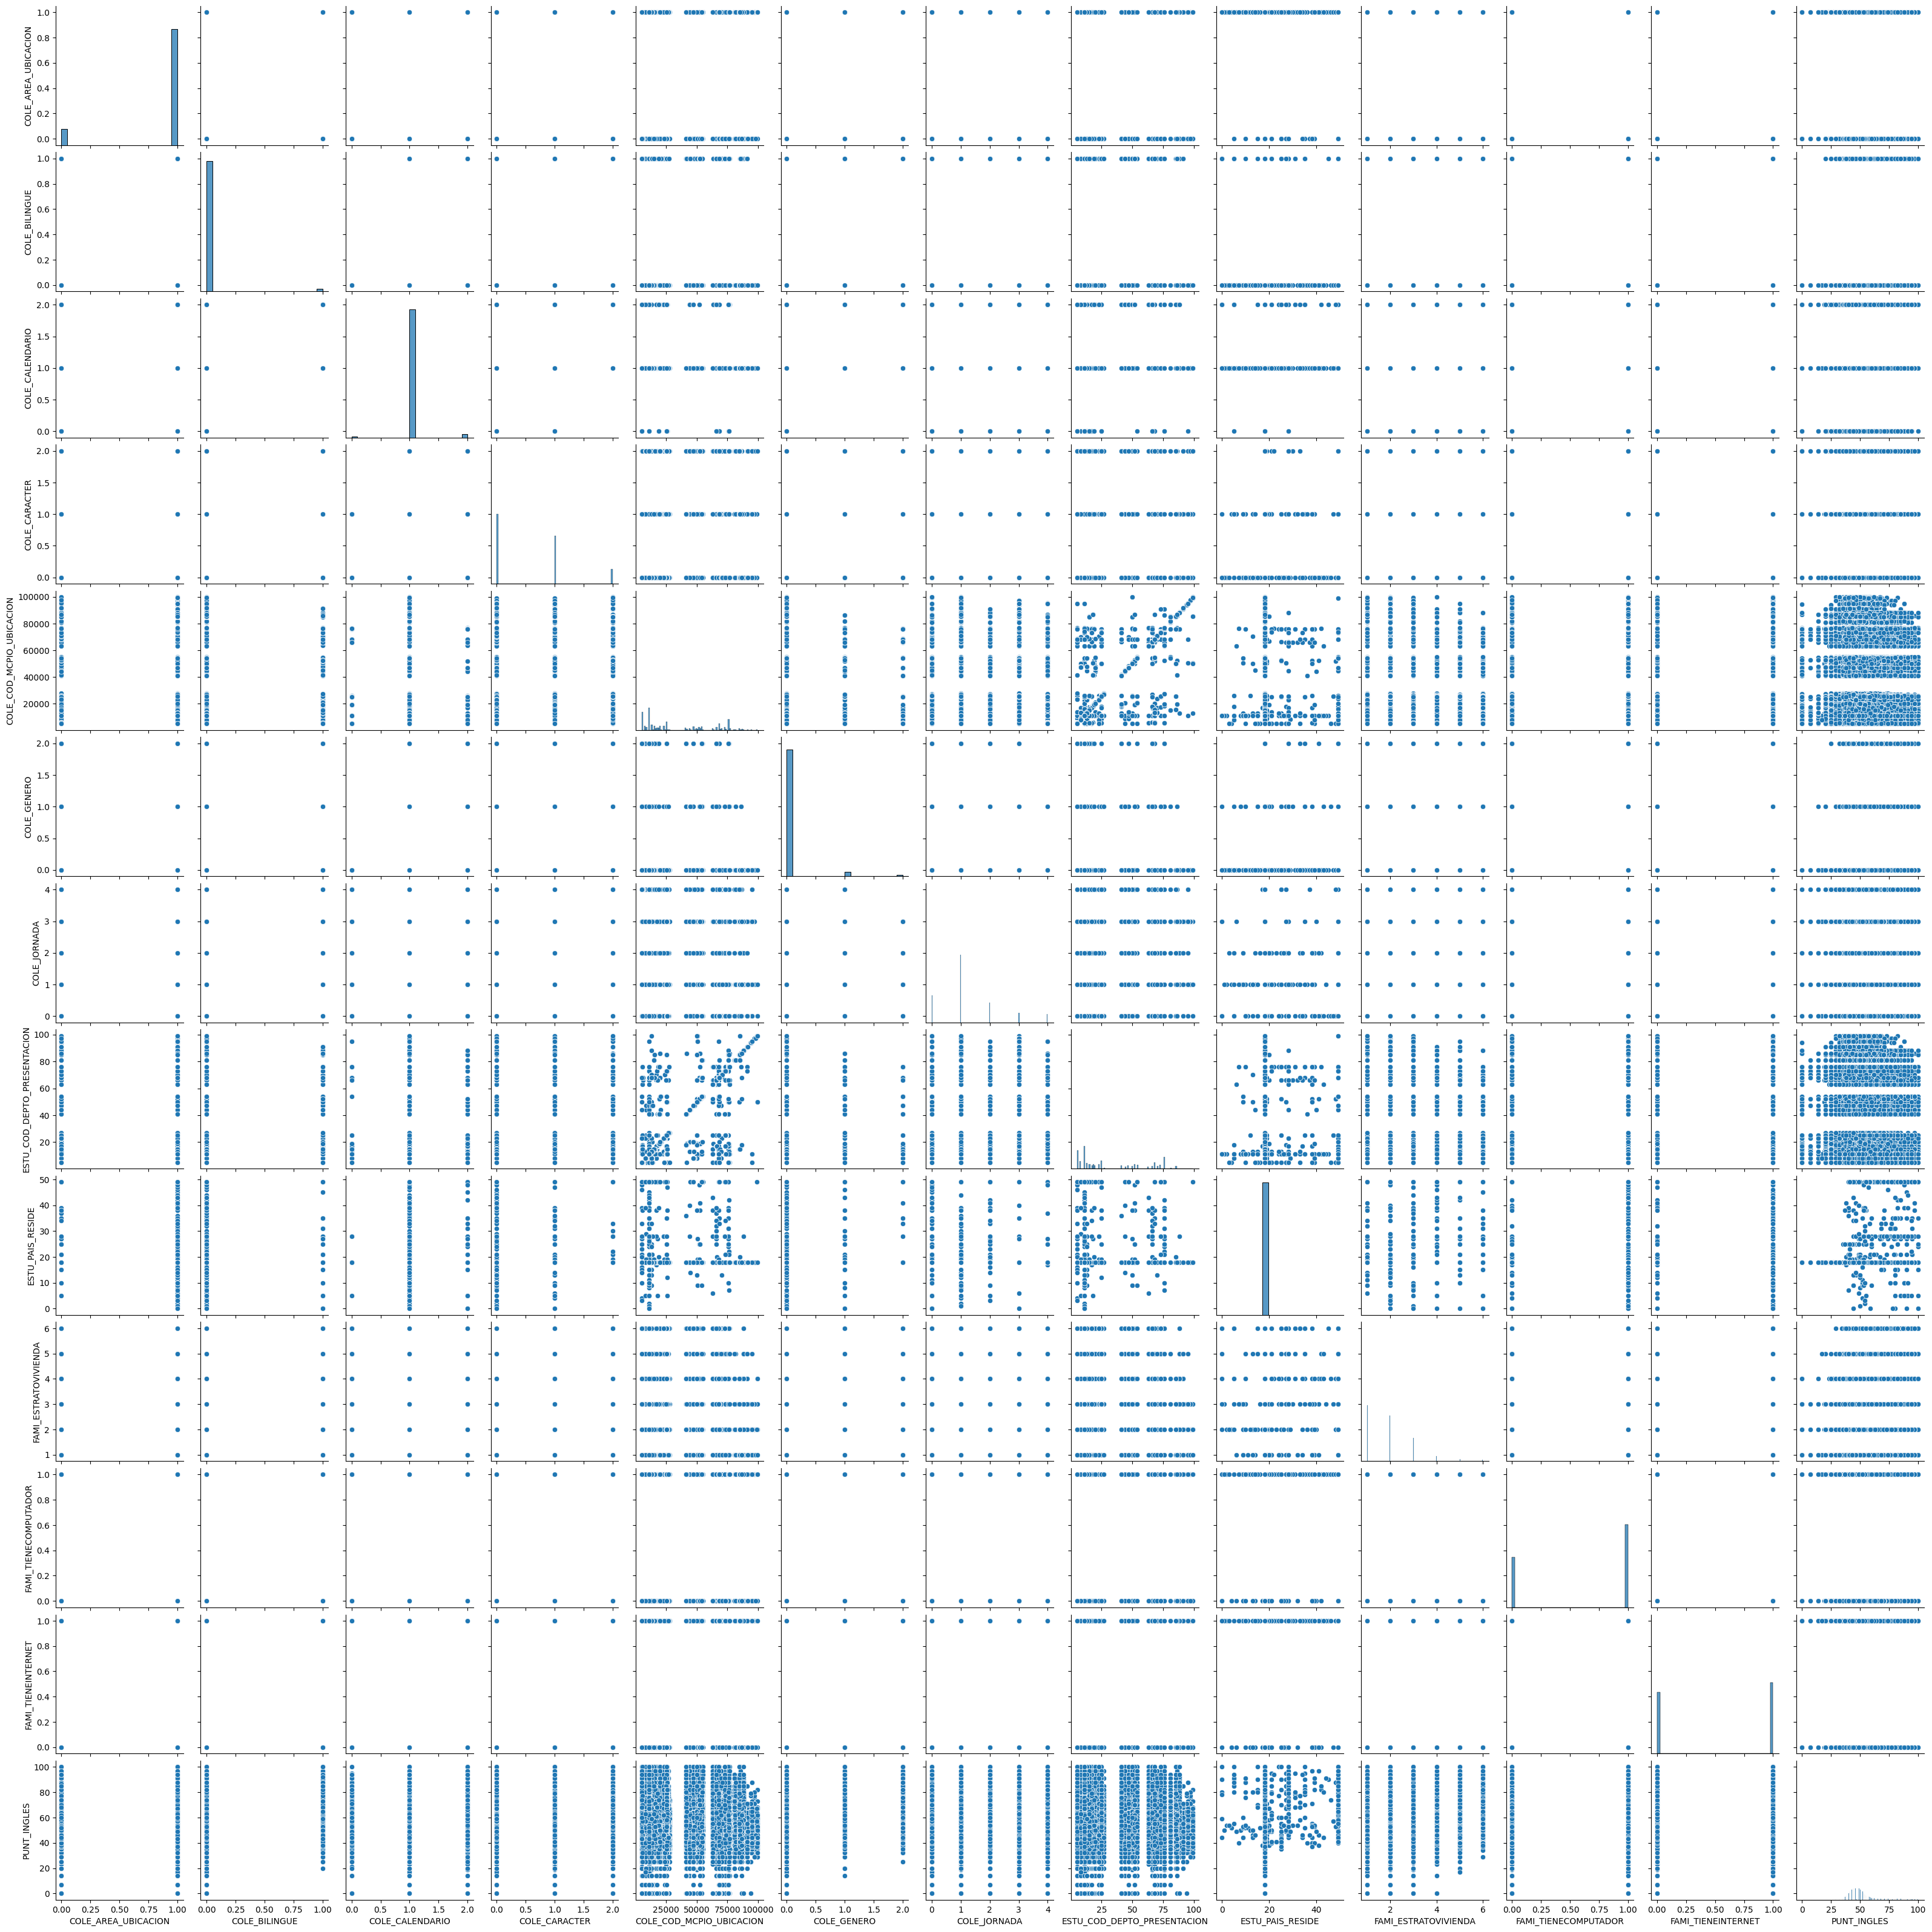

In [73]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df,)

<Axes: >

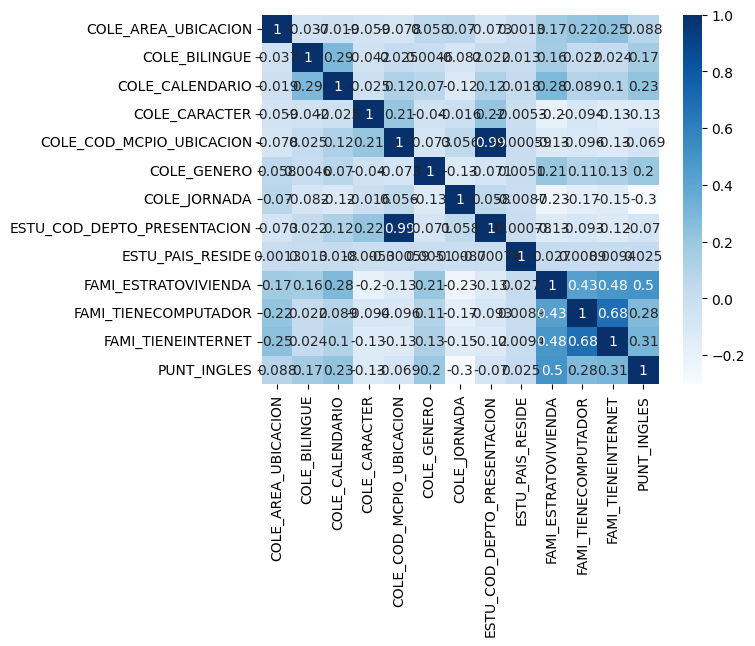

In [74]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

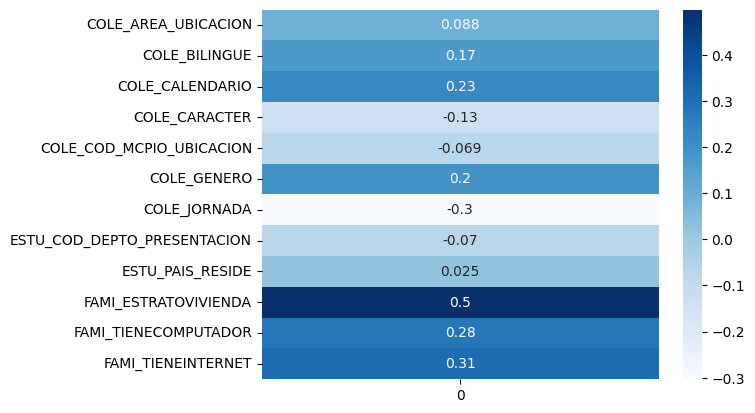

In [75]:
corrw = df.drop(['PUNT_INGLES'], axis=1).corrwith(df['PUNT_INGLES'])
sb.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

In [ ]:
#sns.pairplot(df, x_vars=['VARIABLE 1','VARIABLE 2','VARIABLE 3'], y_vars='PUNT_INGLES', height=7, aspect=0.7, kind='reg')